In [6]:
import hd_features as hd
import hd_constants
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
########sinlge hd_features calculation#################################

#examples for birth time format
zone = 'Europe/Berlin'
birth_time= 1876,1,5,10,2,4 #konrad adenauer
zone = 'Asia/Shanghai'
birth_time= 1935,7,6,4,48,0 #dalai lama

#automatic time_zone offset (uses pytz lib) calculation, avail. timezones-> pytz.all_timezones
hours = hd.get_utc_offset_from_tz(birth_time,zone) 
##manual time_zone offset calculation
#hours=number

timestamp = tuple(list(birth_time) + [hours])
single_result = hd.calc_single_hd_features(timestamp,report=True,channel_meaning=True)

birth date: (1935, 7, 6, 4, 48)
create date: (1935, 4, 5, 14, 34)
energie-type: G
inner authority: SP
inc. cross: ((39, 38), (21, 48))-RAC
profile: (4, 6)
active chakras: {'RT', 'SP', 'SL', 'HT'}
split: 2
variables: {'right_up': 'right', 'right_down': 'left', 'left_up': 'left', 'left_down': 'left'}


,label,planets,lon,gate,line,color,tone,base,ch_gate
0,prs,Sun,102.882843,39,4,4,4,5,0
1,prs,Earth,282.882843,38,4,4,4,5,0
2,prs,Moon,159.214895,40,4,5,2,1,37
3,prs,North_Node,292.008482,61,2,3,1,2,0
4,prs,South_Node,112.008482,62,2,3,1,2,0
5,prs,Mercury,85.509489,12,4,1,3,4,0
6,prs,Venus,148.202424,29,4,6,5,1,0
7,prs,Mars,198.251811,57,4,3,1,1,0
8,prs,Jupiter,223.473010,1,1,2,3,3,0
9,prs,Saturn,340.056575,37,5,4,4,2,40


,label,planets,gate,ch_gate,gate_chakra,ch_gate_chakra,ch_gate_label,gate_label,meaning
0,prs,Moon,40,37,HT,SP,"[prs, des]",[prs],"[Community, A d. of being part, seeking a whole]"
1,des,North_Node,60,3,RT,SL,[des],[des],"[Mutation, Energy which fluctuates and initiat..."


In [3]:
########composite hd_features calculation#################################
hours=2 #time_zone offset
#define persons you want to combine
persons_dict = {"1":(1990,1,30,1,2,0,hours),
                "2":(2010,2,30,1,2,0,hours),
                "3":(2020,6,30,1,2,0,hours),
               }
#composite channels and chakras
hd.get_composite_combinations(persons_dict)
#full view, with readable meanings
hd.get_composite_combinations(persons_dict).explode(["new_channels","new_ch_meaning"])
#composite gates matching penta 
hd.get_penta(persons_dict)

,31,8,33,7,1,13,15,2,46,5,14,29
index,,,,,,,,,,,,
1,o,o,x,x,x,x,x,o,o,o,o,o
2,o,o,o,x,o,o,o,o,x,x,o,o
3,o,x,o,o,o,o,x,o,o,o,o,o
all,o,x,x,x,x,x,x,o,x,x,o,o


  0%|          | 0/112129 [00:00<?, ?it/s]

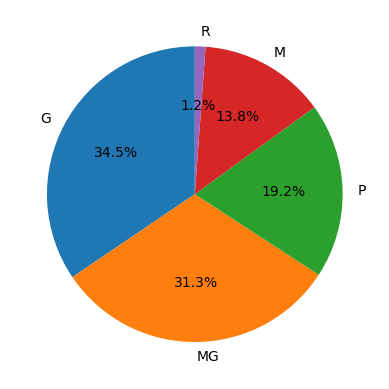

In [14]:
########multiple hd_features calculation#################################
#benchmark:  ~100000 calculations-> ~2 min @ 6cores,16GB RAM

start_date = 1781-30,1,1,1,1
end_date = 2027+30, 12, 31,23,1
percentage = 1 #full proccesing of given list?, 1=100%,0=0%
time_unit = "days" #years,months,days,hours,minutes are supported
intervall = 1 #every X unit, note gates changing every ~5 days, lines every 0.9 day
num_cpu = 6
result,timestamp_list = hd.calc_mult_hd_features(start_date,end_date,percentage,time_unit,intervall,num_cpu)
result_lists = hd.unpack_mult_features(result,full=True) #lists are structured as dict

#Example, show simple"Typ"-distribution of calculations
typ_dist = pd.Series(result_lists["typ_list"]).value_counts()/len(result_lists["typ_list"])
labels=typ_dist.index
plt.pie(typ_dist,labels=labels,autopct='%1.1f%%',startangle=90);